In [1]:
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.datasets import load_boston
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [23]:
boston = load_boston().data
X = boston.data
# Y = iris.target

pca = PCA()
pca.fit(X)
pca.transform(X)

array([[-1.19818213e+02, -5.56072403e+00, -3.17255716e+00, ...,
         3.77864866e-01, -7.14419234e-02,  3.35601653e-02],
       [-1.68889931e+02,  1.01141970e+01, -3.07818528e+01, ...,
         4.80642168e-02, -9.48218694e-02, -3.31213461e-02],
       [-1.69311506e+02,  1.40785539e+01, -1.67536418e+01, ...,
        -4.68348169e-01, -1.07330420e-01, -4.44679120e-03],
       ...,
       [-1.38386700e+02,  9.36859233e-01, -3.72850733e+01, ...,
        -2.98531518e-01, -1.04735416e-01,  4.31279438e-02],
       [-1.37504734e+02,  4.25059832e+00, -3.59882682e+01, ...,
        -1.94722041e-01, -9.55415018e-02,  4.51444687e-02],
       [-1.39189872e+02,  1.00782973e+00, -2.97723299e+01, ...,
         4.15724707e-01, -7.04680630e-02,  4.55799864e-02]])

(506, 13)
(13, 13)
[[ 2.90793419e-02  5.95358534e-03  1.15545558e-02  2.70010188e-02
  -9.53871801e-01  1.66034349e-01  2.12852802e-01  1.22652780e-01
  -1.37295009e-02 -1.64239950e-02 -2.26717798e-03 -1.96895829e-03
  -5.31945672e-04]
 [-4.35901380e-02  1.17454545e-03 -6.32896919e-01  7.68061562e-01
   5.65379161e-03 -4.67338831e-02  3.51765463e-02 -5.14137943e-02
  -2.35097342e-02  3.06822647e-02  5.52239680e-03  1.93077157e-04
  -1.26484702e-04]
 [ 2.83311855e-02 -4.94881025e-03  8.83404215e-02 -1.27967832e-02
   5.62384400e-02 -3.41930158e-01  7.85689932e-01 -4.92499396e-01
  -3.52709234e-02 -9.80506614e-02 -1.78836080e-02  8.12264863e-03
   4.23973117e-03]
 [-5.55834285e-05 -1.02672761e-04  9.75318528e-04  8.54486450e-04
   2.13578787e-03  3.51936887e-03  5.09255442e-03 -1.13553131e-02
   1.78059044e-02  1.56368116e-03 -1.57986254e-02 -9.99597129e-01
   7.93521442e-03]
 [ 4.49723983e-04  1.83085404e-06  1.80719024e-03  6.79594077e-04
   1.79163493e-04 -1.87779955e-03  3.85766581e-

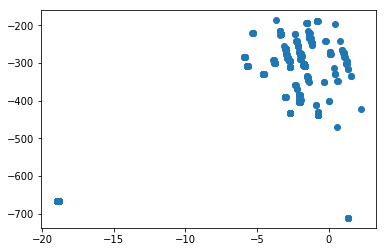

In [24]:
boston = load_boston().data

print(boston.shape) 
# 各行の平均を求める
boston_mu = [sum(boston[:, row]) / len(boston[:, row]) for row in range(boston.shape[1])]
 
# 共分散行列
## 初期化
cov = np.zeros([boston.shape[1], boston.shape[1]])
 
## 共分散を求める
for i in range(boston.shape[1]):
    for j in range(boston.shape[1]):
        cov[i, j] = sum((boston[:, i] - boston_mu[i]) * (boston[:, j] - boston_mu[j])) / boston.shape[0]

print(cov.shape)
# 固有値・固有ベクトルを求める
l, v = np.linalg.eig(cov)
 
# 固有値をソートした時のインデックスリスト
# print(l)
sl = np.argsort(l)

print(v)
# インデックスリストの順で固有ベクトルをソート
sv = v[sl]

print("寄与率")
print(sv.shape)

pca = np.dot(boston, sv)
plt.scatter(pca[:, -1], pca[:, -2])

In [68]:
def pca_use_org(data):
    # ##################### 主成分分析 ########################
    # 共分散行列を求める
    cov_matrix = np.cov(data, rowvar=False)
 
    # 固有値と固有ベクトルを取得する
    l, v = np.linalg.eig(cov_matrix)
 
    # 固有値を大きい順に並べる
    l_index = np.argsort(l)[::-1]
    l_ = l[l_index]
    v_ = v[:, l_index]
    data = data[:, l_index]
    print(v_.shape)
    print(v_)
    # v2 = (v * v).sum(axis=1)
    # print(np.sqrt(v2))
    print("v_")
    print(l_index)
    print(l_)
 
    # 固有ベクトルを使ってデータを変換する
    data_trans = np.dot(data, v_)
 
    return data_trans, v_

(150, 4)
(4, 4)
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
v_
[0 1 2 3]
[4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


/Users/ryosuke/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


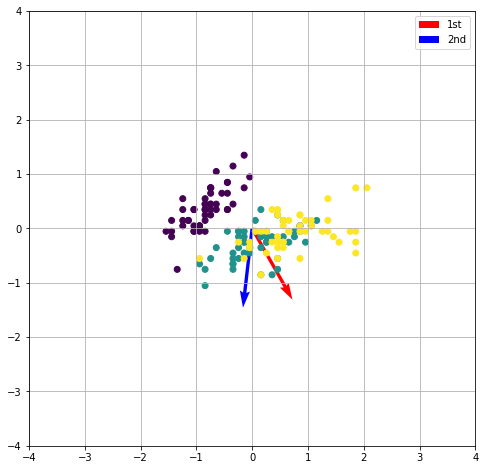

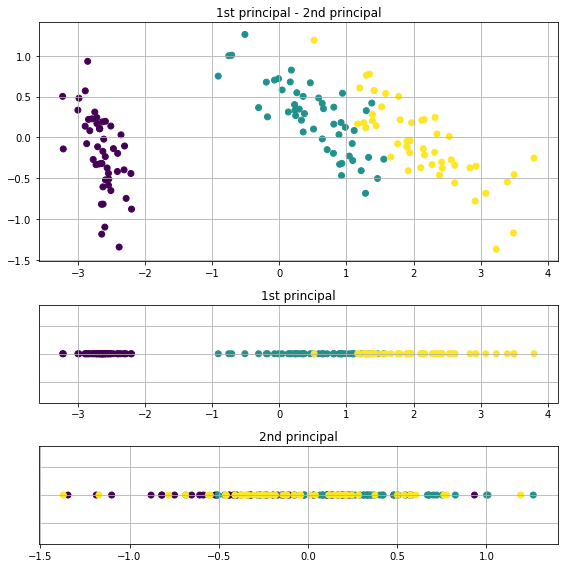

In [69]:
# ###################### データ作成 ########################
# データセットから2次元データを切り出す
d_index = [0, 2]
iris = load_iris()
data = iris.data
# data = data[:, d_index]
# data = data[:, 2:]

# データ全体の平均を0にする
# print('data=', data)
data -= data.mean(axis=0)
# print('data=', data)

# #################### 主成分分析開始 #######################
print(data.shape)
data_trans, v = pca_use_org(data)

print(v)
# ###################### 作図準備 ###########################
# 変換軸となるベクトルを描画用の変数に格納
vec_s = [0, 0]
vec_1st_e = [2*v[0, 0], 2*v[0, 1]]
vec_2nd_e = [2*v[1, 0], 2*v[1, 1]]

# ######################## 作図開始 ########################
# -------------------- 変換前データと変換軸ベクトル ---------
plt.figure(figsize=[8, 8])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.quiver(vec_s[0], vec_s[1], vec_1st_e[0], vec_1st_e[1],
           angles='xy', scale_units='xy', scale=1, color='r', label='1st')
plt.quiver(vec_s[0], vec_s[1], vec_2nd_e[0], vec_2nd_e[1],
           angles='xy', scale_units='xy', scale=1, color='b', label='2nd')
plt.grid()
plt.legend()
plt.scatter(data[:, 0], data[:, 1], c=iris.target)

# -------------- 変換後データ、第1主成分、第2主成分 ---------
plt.figure(figsize=[8, 8])
plt.subplot2grid((4, 1), (0, 0), rowspan=2)
plt.title('1st principal - 2nd principal')
plt.grid()
plt.scatter(data_trans[:, 0], data_trans[:, 1], c=iris.target)
plt.subplot2grid((4, 1), (2, 0))
plt.tick_params(labelleft="off", left="off")
plt.title('1st principal')
plt.grid()
plt.scatter(data_trans[:, 0], np.zeros(len(data_trans[:, 0])), c=iris.target)
plt.subplot2grid((4, 1), (3, 0))
plt.title('2nd principal')
plt.grid()
plt.tick_params(labelleft="off", left="off")
plt.scatter(data_trans[:, 1], np.zeros(len(data_trans[:, 1])), c=iris.target)
plt.tight_layout()
plt.show()

 # 特異値分解

In [69]:
n = 5
p = 3
np.random.seed(2)
X = np.random.randint(0, 10, size=(n, p))
print(X)

# 固有値・固有ベクトルを求める
l1, U = np.linalg.eig(X.dot(X.T))
l2, V = np.linalg.eig(X.T.dot(X))

U = -U
print("--------")

l1_index = np.argsort(l1)[::-1]
l1 = l1[l1_index]
# print(l1[:p])
U = U[:, l1_index]
# U = U[:, :p]
# print(U.shape)

l2_index = np.argsort(l2)[::-1]
l2 = l2[l2_index]
V = V[:, l2_index]
# print(V)

A = np.diag(np.sqrt(l1[:p]))
# print(A)
# print(l1)
# print(l2)
# print(U.dot(A).dot(V.T))


print("----------")
u, sigma, v = np.linalg.svd(X)
print(u)
print(U)

print(v)
print(V)

print(sigma)
print(A)



[[8 8 6]
 [2 8 7]
 [2 1 5]
 [4 4 5]
 [7 3 6]]
--------
----------
[[-0.613 -0.143  0.613 -0.239 -0.414]
 [-0.487  0.788 -0.136 -0.133  0.324]
 [-0.231 -0.089 -0.739 -0.284 -0.558]
 [-0.367 -0.034 -0.12   0.91  -0.147]
 [-0.447 -0.591 -0.212 -0.128  0.625]]
[[-0.613 -0.143  0.613 -0.038  0.136]
 [-0.487  0.788 -0.136 -0.259 -0.326]
 [-0.231 -0.089 -0.739 -0.017  0.209]
 [-0.367 -0.034 -0.12   0.885  0.734]
 [-0.447 -0.591 -0.212 -0.384 -0.541]]
[[-0.532 -0.576 -0.621]
 [-0.781  0.616  0.098]
 [ 0.326  0.537 -0.778]]
[[-0.532 -0.781 -0.326]
 [-0.576  0.616 -0.537]
 [-0.621  0.098  0.778]]
[20.549  5.138  3.652]
[[20.549  0.     0.   ]
 [ 0.     5.138  0.   ]
 [ 0.     0.     3.652]]


In [74]:
n = 12
p = 10

# np.set_printoptions(precision=3, suppress=True)

# 分解する行列
c = np.random.randint(0, 10, size=(n, p))


# 特異値行列Σ(sigma) → 右特異行列V(v) → 左特異行列U(u) の順に求める

# C^TCの固有値と固有ベクトルの計算
ctc = np.dot(c.T, c)
eigen_values, eigen_vectors = np.linalg.eig(ctc)

# 特異値の計算
singular_values = np.sqrt(eigen_values)
singular_index = np.argsort(singular_values)[::-1]

# 特異値行列の計算
sigma = np.diag(singular_values[singular_index])

# 右特異行列の計算
v = eigen_vectors[:,singular_index]

# 左特異行列の計算
u = np.array([np.dot(c, v[:,i]) / sigma.diagonal()[i] for i in range(len(sigma.diagonal()))]).T

print(c)
print(u.dot(sigma).dot(v.T))

# print("-----------")
# print(u, sigma, v)
# print(np.linalg.svd(c))
# 
# print("------------")
# l1, U = np.linalg.eig(c.dot(c.T))
# l2, V = np.linalg.eig(c.T.dot(c))
# l2_index = np.argsort(l2)[::-1]
# V = V[:, l2_index]
# A = np.diag(np.sqrt(l1[:p]))
# print(u)
# print(U)
# 
# print(v)
# print(V)
# 
# print(sigma)
# print(A)


[[6 0 3 6 8 2 1 0 7 5]
 [7 6 9 3 0 4 9 0 2 0]
 [9 4 7 4 6 5 9 5 5 9]
 [2 6 2 9 4 0 9 8 2 1]
 [6 1 9 3 9 2 2 8 2 5]
 [2 9 6 6 5 0 5 3 9 0]
 [7 6 5 7 0 1 9 1 6 0]
 [2 1 6 5 5 5 8 9 1 4]
 [1 5 9 9 5 3 4 0 3 5]
 [9 7 8 6 1 2 0 9 1 0]
 [1 5 4 2 8 1 9 8 6 6]
 [4 2 2 3 7 4 3 0 2 1]]
[[ 6. -0.  3.  6.  8.  2.  1.  0.  7.  5.]
 [ 7.  6.  9.  3. -0.  4.  9.  0.  2.  0.]
 [ 9.  4.  7.  4.  6.  5.  9.  5.  5.  9.]
 [ 2.  6.  2.  9.  4.  0.  9.  8.  2.  1.]
 [ 6.  1.  9.  3.  9.  2.  2.  8.  2.  5.]
 [ 2.  9.  6.  6.  5. -0.  5.  3.  9.  0.]
 [ 7.  6.  5.  7. -0.  1.  9.  1.  6. -0.]
 [ 2.  1.  6.  5.  5.  5.  8.  9.  1.  4.]
 [ 1.  5.  9.  9.  5.  3.  4. -0.  3.  5.]
 [ 9.  7.  8.  6.  1.  2. -0.  9.  1. -0.]
 [ 1.  5.  4.  2.  8.  1.  9.  8.  6.  6.]
 [ 4.  2.  2.  3.  7.  4.  3.  0.  2.  1.]]
